# **Exploratory Data Analysis of car data in python** 

## 1. Importing required libraries for EDA

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #visualisation
import seaborn as sns             #visualisation
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
plt.rcParams["figure.figsize"] = (10,6)  
sns.set(color_codes=True,style=None)

In [ ]:
#Importing Dataset 
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## 1.1 Loading Data into the Dataframe DSet

In [ ]:
import io
DSet = pd.read_csv(io.BytesIO(uploaded['data.csv']))  
DSet.head()   # To display top 5 rows

In [ ]:
DSet.columns      #Displays columns in the data file

## 1.2 Checking the datatypes of different columns and statistical summary of the dataset.

In [ ]:
DSet.dtypes       # command is used to find datatypes of individual columns only.The difference between commands .dtypes and .info() is evident below.

In [ ]:
DSet.info()       # provides with the information of the Dataset columns regarding null values and its Datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
DSet.shape        # Gives the total number of rows and columns 

(11914, 16)

In [ ]:
DSet.describe()   # Gives the statistical analysis

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## 2. Dropping columns of less significance

In [ ]:
DSet.isnull().sum()
# Finds the null values in different columns and gives a total number of the null values by summing.

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**Reasoning** : **Selection for dropping column and Reasoning**

After calculating overall null values in the dataset, it is evident that the total null values in market category are 3742 therefore it can be dropped.

{*Number of doors*  and *Engine fuel* type don't affect the price of cars as much as the other parameters affect therefore they can also be dropped.}

In [ ]:
DSet=DSet.drop(['Market Category','Engine Fuel Type'],axis=1)
#Dropping column that is of less significance.

In [ ]:
DSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Number of Doors    11908 non-null  float64
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  highway MPG        11914 non-null  int64  
 11  city mpg           11914 non-null  int64  
 12  Popularity         11914 non-null  int64  
 13  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


In [ ]:
DSet.shape

(11914, 14)

## 3. Renaming the columns 

In [ ]:
DSet=DSet.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders'})
DSet=DSet.rename(columns={'Driven_Wheels':'Drive Mode','highway MPG': 'MPG-H'})
DSet=DSet.rename(columns={'city mpg':'MPG-C', 'MSRP': 'Price','TransmissionType':'Transmission'})
#Replacing column names as mentioned.
DSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   HP                 11845 non-null  float64
 4   Cylinders          11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Drive Mode         11914 non-null  object 
 7   Number of Doors    11908 non-null  float64
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  MPG-H              11914 non-null  int64  
 11  MPG-C              11914 non-null  int64  
 12  Popularity         11914 non-null  int64  
 13  Price              11914 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


## 4. Dropping duplicate rows

In [ ]:
DSet.duplicated().sum()
#Checking the total number of duplicated values.

791

In [ ]:
DSet=DSet.drop_duplicates()
#Drops all duplicate rows

In [ ]:
DSet.count()    #Counting rows after removing Duplicates

Make                 11123
Model                11123
Year                 11123
HP                   11054
Cylinders            11093
Transmission Type    11123
Drive Mode           11123
Number of Doors      11117
Vehicle Size         11123
Vehicle Style        11123
MPG-H                11123
MPG-C                11123
Popularity           11123
Price                11123
dtype: int64

## 4.1 Dropping null values 

In [ ]:
DSet.isnull().sum()

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission Type     0
Drive Mode            0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
MPG-H                 0
MPG-C                 0
Popularity            0
Price                 0
dtype: int64

In [ ]:
DSet=DSet.dropna()
DSet.count()

Make                 11024
Model                11024
Year                 11024
HP                   11024
Cylinders            11024
Transmission Type    11024
Drive Mode           11024
Number of Doors      11024
Vehicle Size         11024
Vehicle Style        11024
MPG-H                11024
MPG-C                11024
Popularity           11024
Price                11024
dtype: int64

## 5. Plotting graphs, detecting outliers and removing them.

### 5.1 Plotting Graphs 

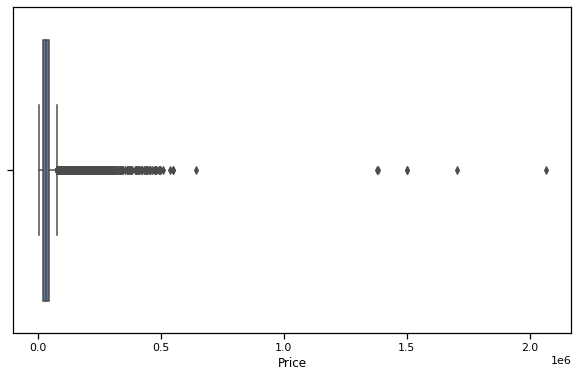

In [ ]:
#Plotting Graphs of various Data Columns to detect outliers
sns.boxplot(x=DSet['Price'])

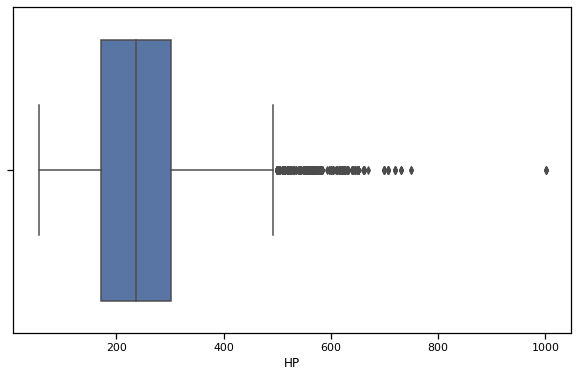

In [ ]:
sns.boxplot(x=DSet['HP'])

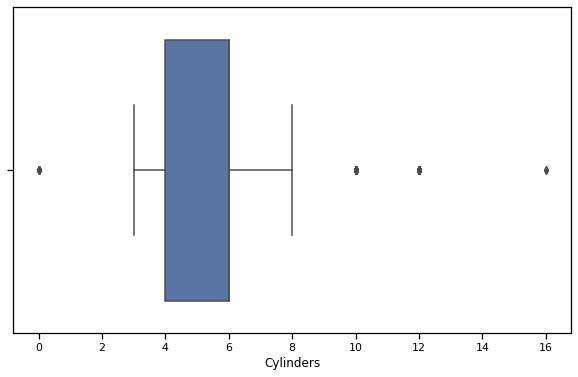

In [ ]:
sns.boxplot(x=DSet['Cylinders'])

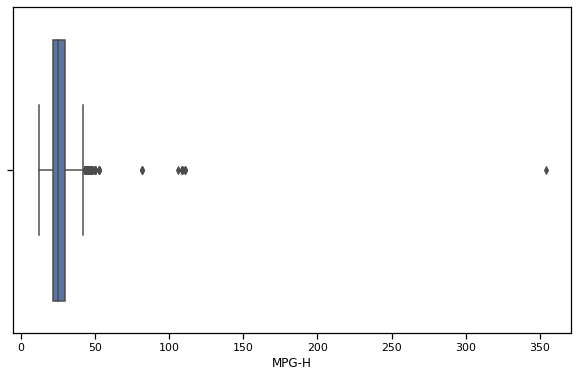

In [ ]:
sns.boxplot(x=DSet['MPG-H'])

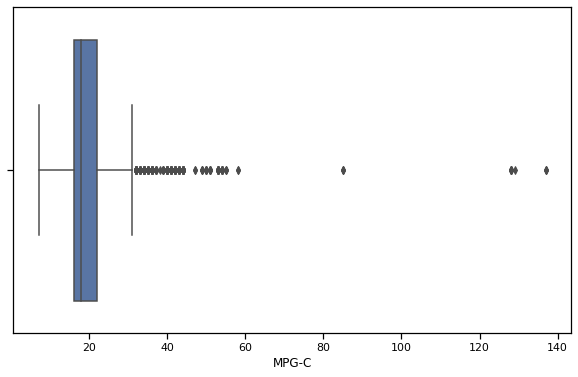

In [ ]:
sns.boxplot(x=DSet['MPG-C'])

In [ ]:
sns.boxplot(x=DSet['Popularity'])

In [ ]:
# Finding outliers using IQR
Q1 = DSet.quantile(0.25)
Q3 = DSet.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                   9.00
HP                   131.00
Cylinders              2.00
Number of Doors        2.00
MPG-H                  8.00
MPG-C                  6.00
Popularity          1460.00
Price              21426.25
dtype: float64

### 5.2 Removing outliers

In [ ]:
# Removing outliers
DSet = DSet[~((DSet < (Q1 - 1.5 * IQR)) |(DSet > (Q3 + 1.5 * IQR))).any(axis=1)]

## 6. Most represented car brands and average price among top 10 car brands

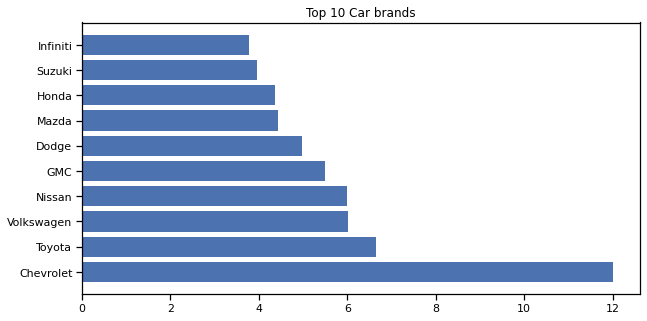

In [ ]:
#Percentage of cars per brand
counts = DSet['Make'].value_counts()*100/sum(DSet['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [ ]:
prices = DSet[['Make','Price']].loc[(DSet['Make'] == 'Chevrolet')|
                                    (DSet['Make'] == 'Infiniti')|
                                    (DSet['Make'] == 'Suzuki')|
                                    (DSet['Make'] == 'Volkswagen')|
                                    (DSet['Make'] == 'Toyota')|
                                    (DSet['Make'] == 'Dodge')|
                                    (DSet['Make'] == 'Nissan')|
                                    (DSet['Make'] == 'GMC')|
                                    (DSet['Make'] == 'Honda')|
                                    (DSet['Make'] == 'Mazda')].groupby('Make').mean()
prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


## 7. Correlation matrix

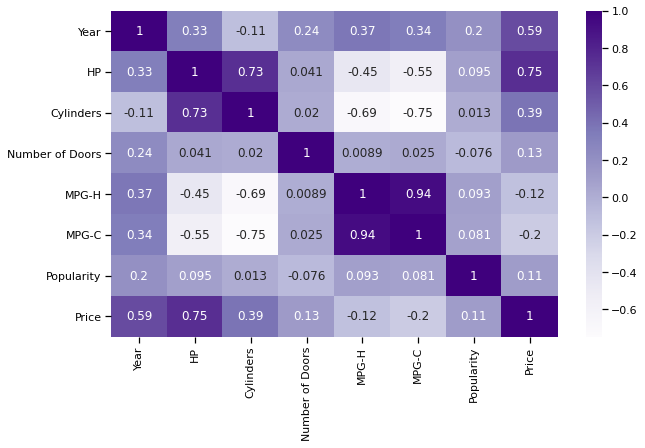

In [ ]:
#Plotting Correlation Matrix
corrMatrix = DSet.corr()
sns.heatmap(corrMatrix,cmap='Purples', annot=True)

### INSIGHTS
The correlation matrix gives a relationship between the 2 variables marked on X and y axis. The closer the number is to 1 or -1 the more correlated it is with the corresponding variable.

From the correlation Matrix we can conclude the following points:

*   The more the Engine HP & Year more is the price.
*   MPG-H and MPG-C are highly correlated

*   MPG-C & MPG-H are inversely dependant or negatively correlated.
*   HP is highly correlated to cylinders.

*   Price is positively dependant on 3 factors cylinder,HP & year.







## 8. EDA

### Scatterplot

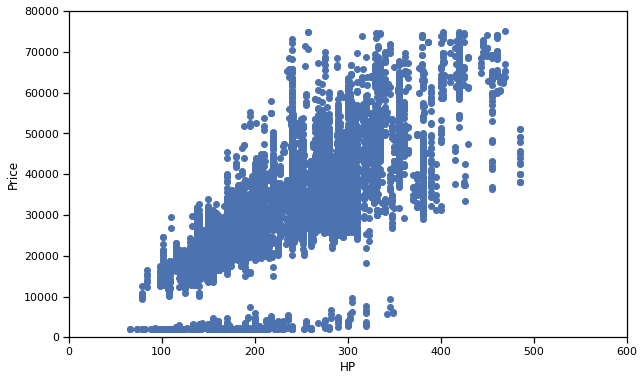

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax=plt.axes()
ax.scatter(DSet['HP'],DSet['Price'])
ax.set_xlim((0,600))
ax.set_ylim((0,80000))
ax.set_xlabel('HP')
ax.set_ylabel('Price')
ax.set_facecolor('White')
fig.canvas.draw()
plt.show()


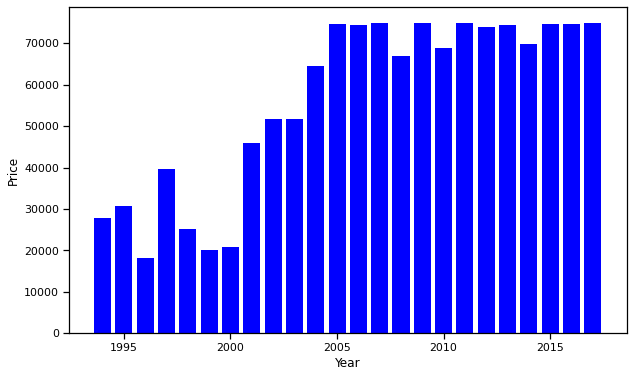

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(DSet['Year'],DSet['Price'],color=['Blue'])
ax.set_facecolor("White")
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

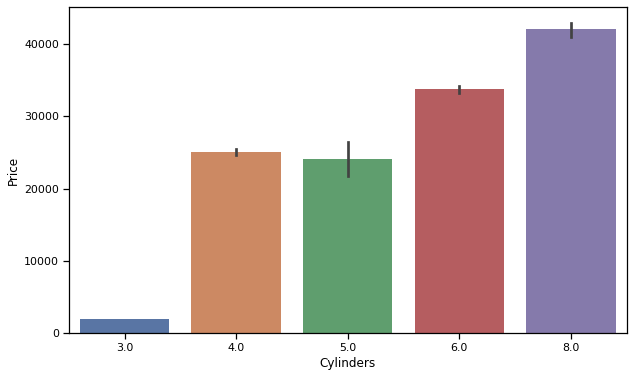

In [ ]:
sns.barplot(DSet['Cylinders'],DSet['Price'])

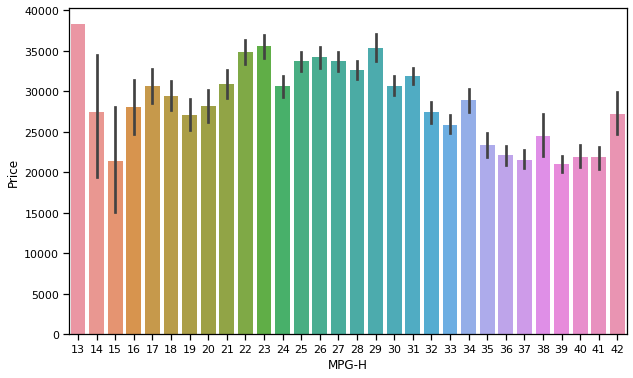

In [ ]:
sns.barplot(DSet['MPG-H'],DSet['Price'])

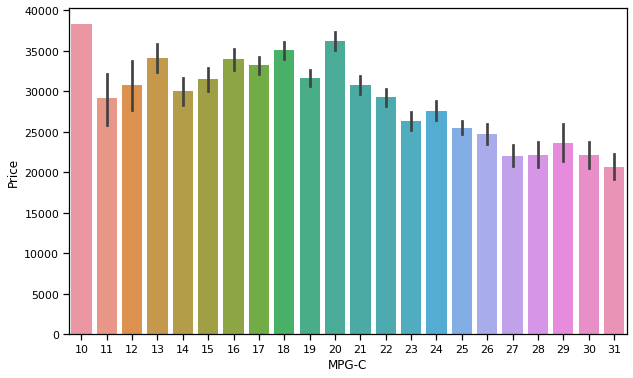

In [ ]:
sns.barplot(DSet['MPG-C'],DSet['Price'])



*   Car price increased after 2000 and after 2005 has shown somewhat constant values
*   Price is directly proportional to price, more the number of cylinders more is the price.

*   Price is maximum for MPG-H 13 and minimum for MPG-H 15
*   Price is maximum for MPG-C 10 and minimum for MPG-C 31





## 9.Base ML Model

In [ ]:
Diffdtypes=DSet.select_dtypes(exclude=[np.number]).columns   # defining all different datatypes
print(Diffdtypes)

Index(['Make', 'Model', 'Transmission Type', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')


In [ ]:
# Encoding Datatypes that are other than int and float
labelencoder=LabelEncoder()
One_Hot_Encoder=OneHotEncoder()
from sklearn.compose import ColumnTransformer 
DSet['Make']=labelencoder.fit_transform(DSet['Make'])
DSet['Model']=labelencoder.fit_transform(DSet['Model'])
DSet['Transmission Type']=labelencoder.fit_transform(DSet['Transmission Type'])
DSet['Drive Mode']=labelencoder.fit_transform(DSet['Drive Mode'])
DSet['Vehicle Size']=labelencoder.fit_transform(DSet['Vehicle Size'])
DSet['Vehicle Style']=labelencoder.fit_transform(DSet['Vehicle Style'])

In [ ]:
X=DSet[['Popularity','Year','HP','Cylinders','MPG-C','MPG-H']].values
y=DSet['Price'].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
#Splitting the dataset
y=DSet['Price']
X=DSet.iloc[:,:-1]
y=DSet.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape) 

(6837, 13) (6837,)
(1710, 13) (1710,)


In [ ]:
#Training the dataset
LR = LinearRegression()
model=LR.fit(X_train,y_train)

Text(0, 0.5, 'Predicted Values')

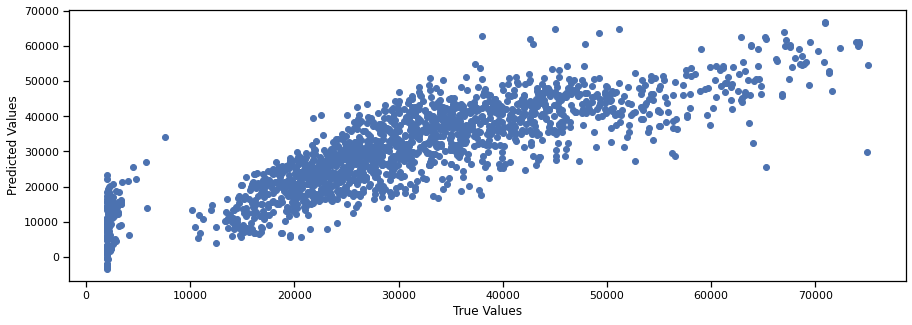

In [ ]:
# Making predictions on the trained dataset
prediction=LR.predict(X_test)
plt.figure(figsize=(15,5))
plt.scatter(y_test,prediction)
plt.xlabel('True Values')
plt.ylabel("Predicted Values")

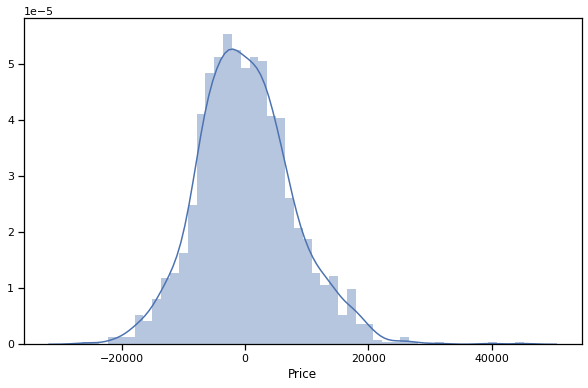

In [ ]:
sns.distplot((y_test-prediction),bins=50)

In [ ]:
#Calculating the required metrics
from sklearn import metrics
print('Mean squared error : ',metrics.mean_absolute_error(y_test,prediction))
print('Root mean squared error : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R2 score: ',metrics.r2_score(y_test,prediction))

Mean squared error :  6077.621117341526
Root mean squared error :  7826.823680085736
R2 score:  0.7200334389928578


## 10. Spot checking algorithms

### 10.1 Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean squared error : ',metrics.mean_absolute_error(y_test,pred))
print('Root mean squared error : ',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 score: ',metrics.r2_score(y_test,pred))

Mean squared error :  3177.317543859649
Root mean squared error :  4485.798953852698
R2 score:  0.9080366733977022


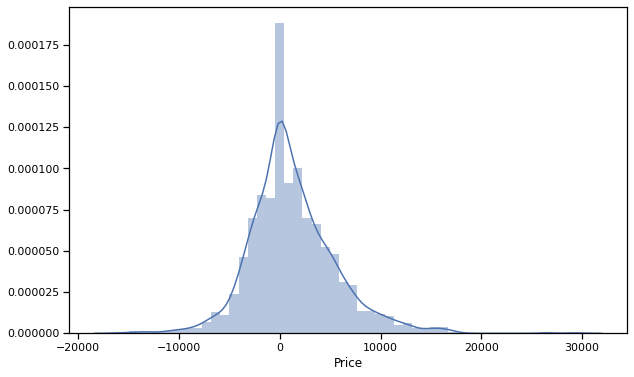

In [ ]:
sns.distplot((y_test-pred),bins=50)

### 10.2 XG Boost Regression

In [ ]:
import xgboost as xgb
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
preds=model.predict(X_test)

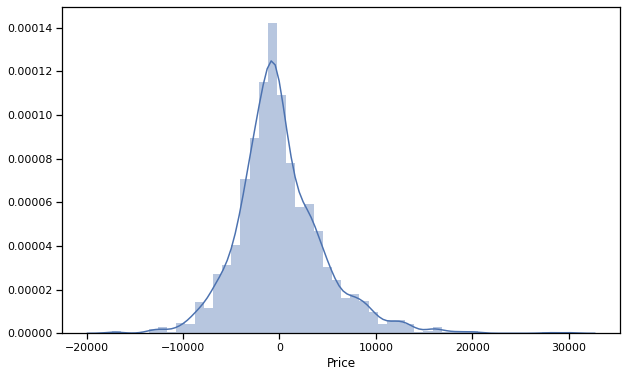

In [ ]:
sns.distplot((y_test-preds),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 Score:', metrics.r2_score(y_test, preds))

Mean Absolute Error: 3311.5133029653166
Root Mean Squared Error: 4587.209127575606
R2 Score: 0.9038316551337016


### 10.3 Random Forest Reggression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

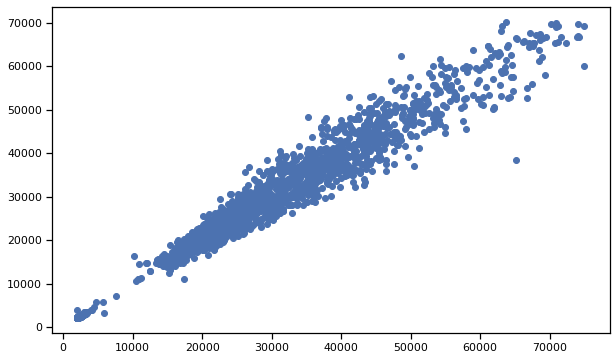

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

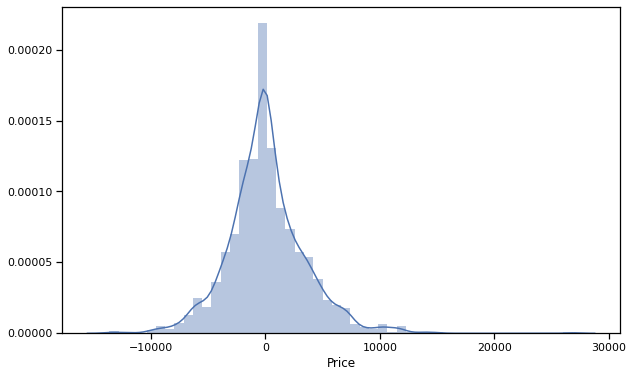

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2445.519945411726
Root Mean Squared Error: 3423.578061834881
R2 Score: 0.9464332211490456


## **Conclusion**: 
  After implementing the above three models we find that the most accurate results are given by random forest regression.